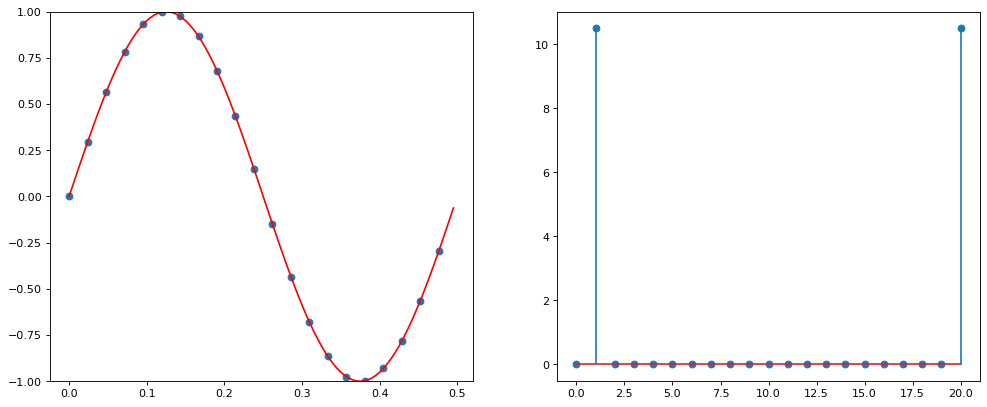

In [18]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 2.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
w = 42       # Częstotliwość probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)


t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
n = len(t)                  # Liczba próbek

signal = f(t)   

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT
signal1 = fft.fft(signal)
signal1 = abs(signal1) # moduł

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
#ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

freqs = range(n)
stem(freqs, signal1, '-*');

# Zadanie 1

## c)

In [ ]:
def przetwarzanie_sygnalu(A_in=1.0, F_in=1.0, LP_in=5, fp = 50):

    T = 1 / F_in  # Okres sygnału
    f = lambda t: A_in * np.sin(2 * np.pi * t * F_in)
    
    tp = 1 / fp  # Okres próbkowania
    t = np.arange(0, LP_in * T, tp)
    n = len(t)
    signal = f(t)
    
    # Wykres w dziedzinie czasu
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Punkty próbkowania")
    
    # Generowanie sygnału ciągłego do wizualizacji
    base_t = np.arange(0, LP_in * T, 1 / 200)
    base_signal = f(base_t)  
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły")
    ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_title("Dziedzina czasu")
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    
    # Obliczanie FFT
    signal_fft = fft.fft(signal)
    signal_magnitude = abs(signal_fft[:n // 2])  
    freqs = np.fft.fftfreq(n, d=tp)[:n // 2] 
    
    # Wykres w dziedzinie częstotliwości
    ax = fig.add_subplot(122)
    ax.stem(freqs, signal_magnitude, '-*', basefmt=" ")
    ax.set_title("Dziedzina częstotliwości")
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Moduł")
    ax.set_xlim([0, fp / 2])
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


interact(przetwarzanie_sygnalu, A_in = (0.5, 10, 0.5), F_in = (0.5, 20, 0.5), LP_in = (1, 10, 1), fp = (10, 100, 10))


interactive(children=(FloatSlider(value=1.0, description='A_in', max=10.0, min=0.5, step=0.5), FloatSlider(val…

<function __main__.przetwarzanie_sygnalu(A_in=1.0, F_in=1.0, LP_in=5, fp=50)>

## d)   (5Hz)

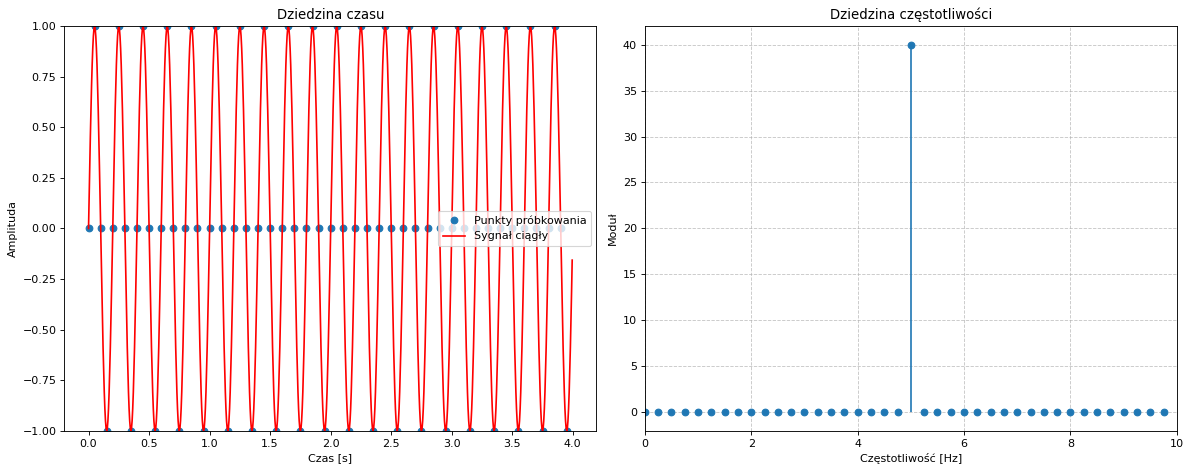

In [20]:
przetwarzanie_sygnalu(1.0, 5.0, 20, 20)

## d)   (21Hz)

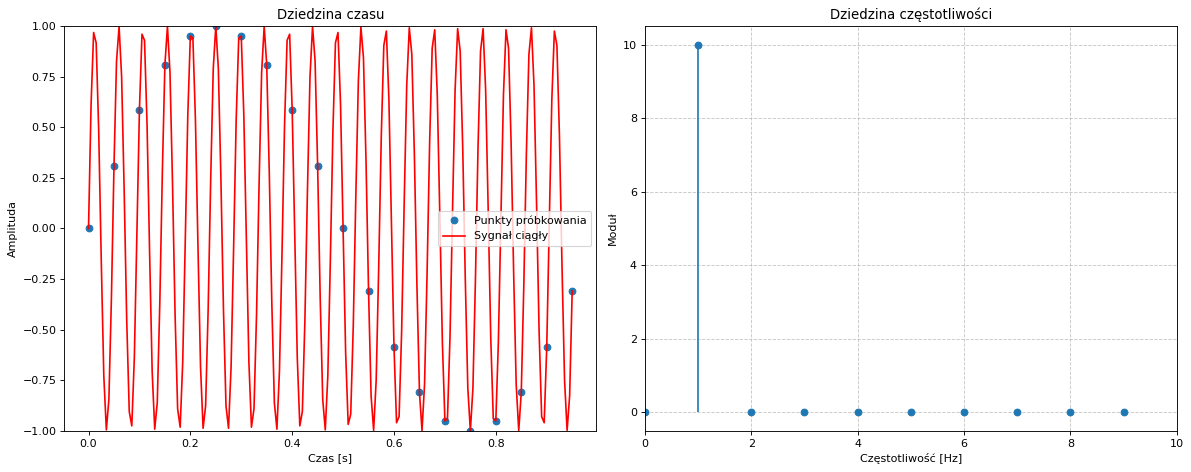

In [21]:
przetwarzanie_sygnalu(1.0, 21, 20, 20)

Sygnał "zawija się" w widmie częstotliwościowym w wyniku niedostatecznej częstotliwości próbkowania.
Dominującą częstotliwość uzyskaną z FFT można obliczyć jako F_in - fp = 21Hz - 20Hz = 1Hz

## f) sin(F * 2πt)

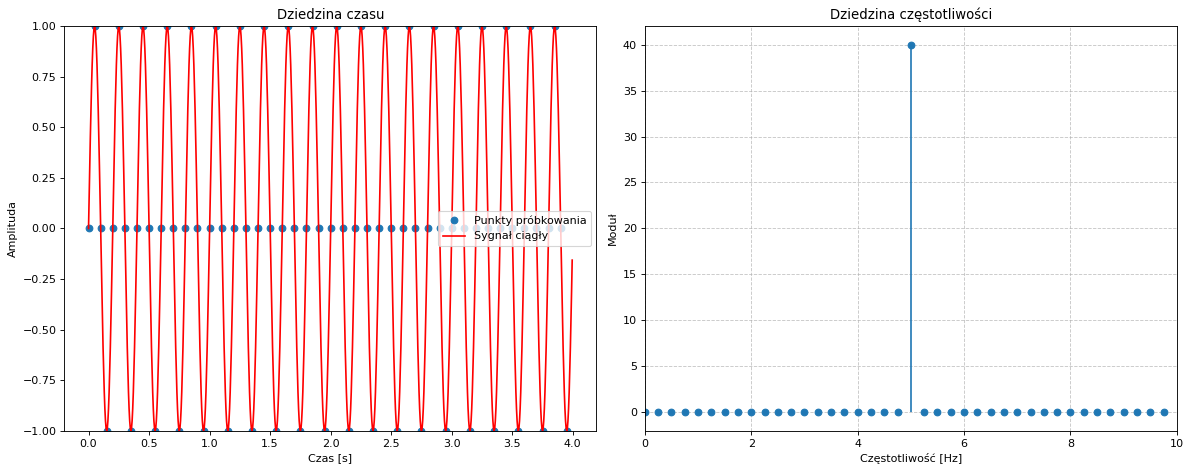

In [22]:
przetwarzanie_sygnalu(1.0, 5, 20, 20)

## f) 2sin(F * 2πt)

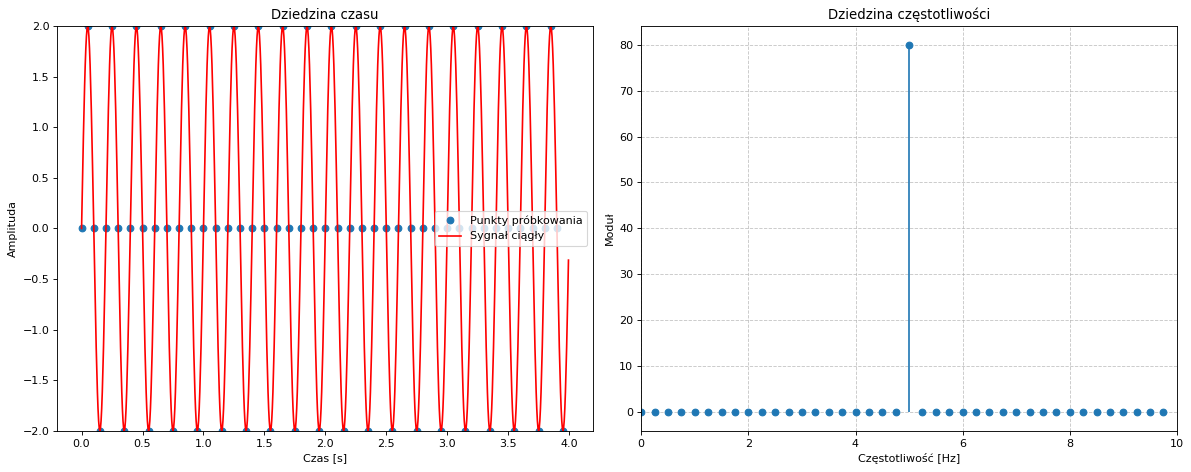

In [23]:
przetwarzanie_sygnalu(2.0, 5, 20, 20)

## f) 3sin(F * 2πt)

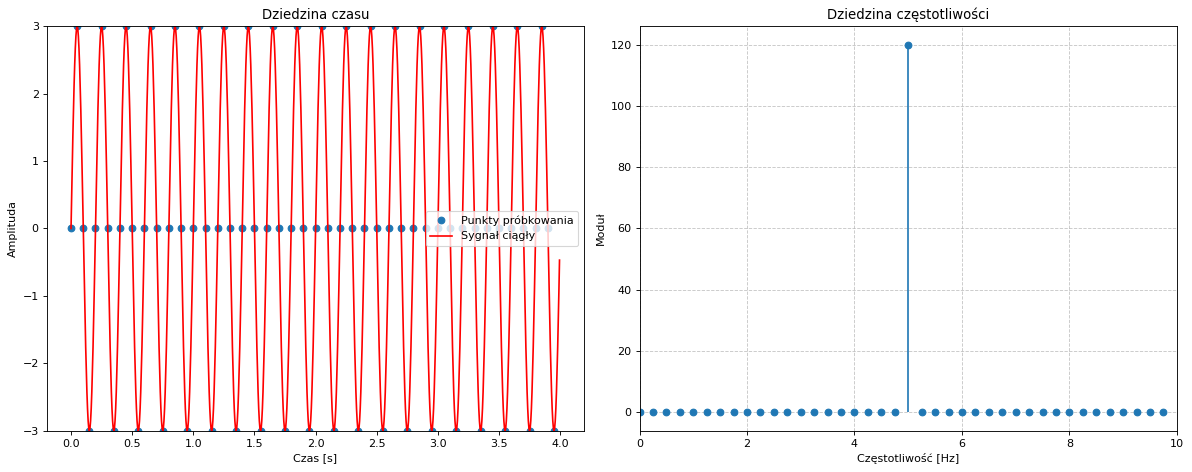

In [24]:
przetwarzanie_sygnalu(3.0, 5, 20, 20)

Wartości maksymalne na osi OY są o tyle razy większe od pierwotnego, o ile została zwiększona amplituda

## g)

interactive(children=(FloatSlider(value=1.0, description='A_in', max=10.0, min=1.0, step=0.5), FloatSlider(val…

<function __main__.przetwarzanie_sygnalu(A_in=1.0, F_in=1.0, LP_in=5, fp=50)>

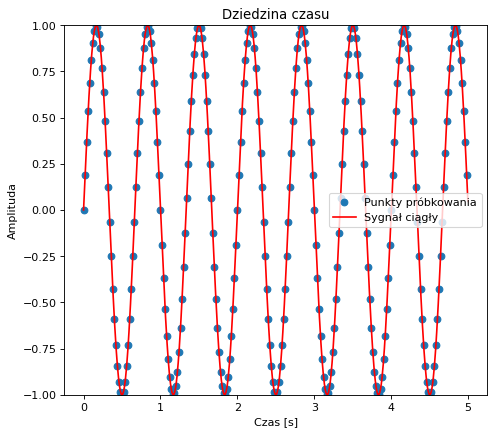

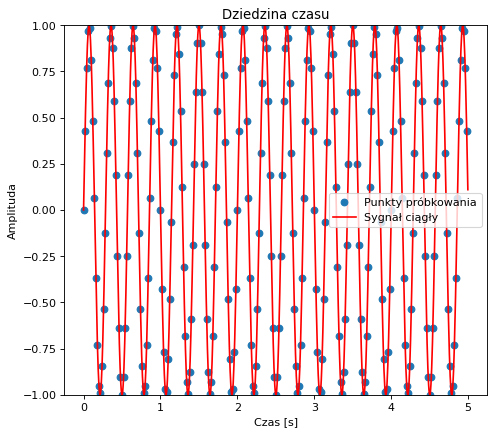

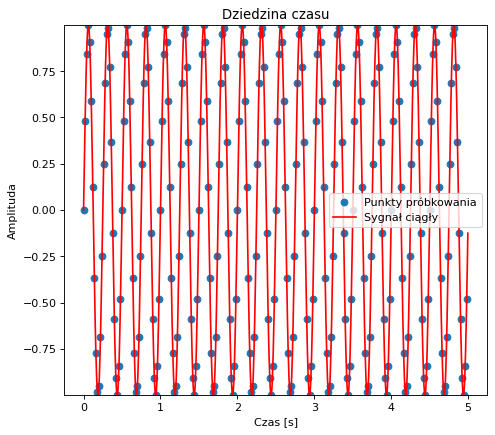

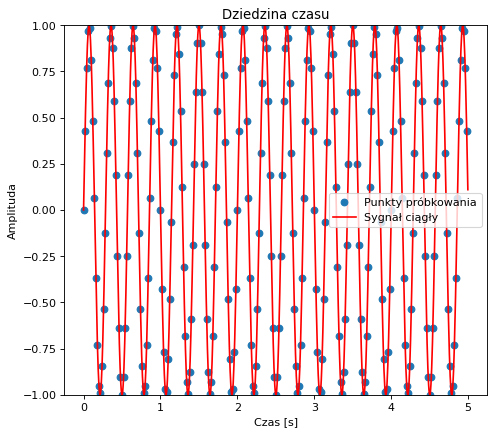

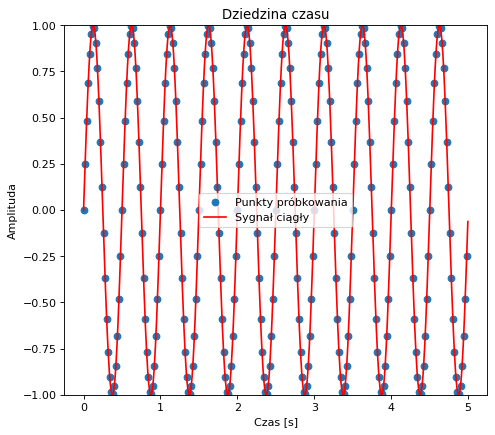

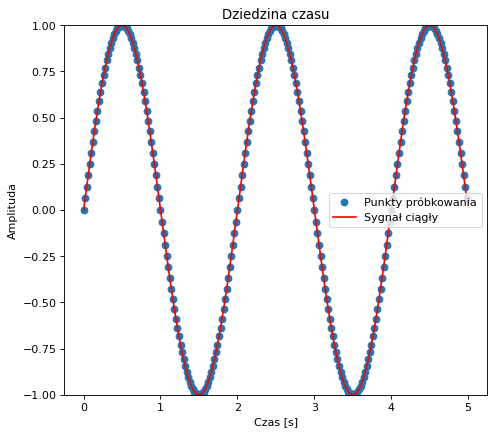

In [ ]:
def przetwarzanie_sygnalu(A_in=1.0, F_in=1.0, LP_in=5, fp = 50):

    T = 1
    f = lambda t: A_in * np.sin(2 * np.pi * t * F_in)  # Definicja sygnału
    
    tp = 1 / fp  # Okres próbkowania
    t = np.arange(0, LP_in * T, tp)  # Momenty próbkowania
    n = len(t)  # Liczba próbek
    signal = f(t)  # Wartości próbek sygnału
    
    # Wykres w dziedzinie czasu
    fig = plt.figure(figsize=(15, 6), dpi=80)
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o', label="Punkty próbkowania")
    
    # Generowanie sygnału ciągłego do wizualizacji
    base_t = np.arange(0, LP_in * T, 1 / 200) 
    base_signal = f(base_t) 
    ax.plot(base_t, base_signal, linestyle='-', color='red', label="Sygnał ciągły")
    ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_title("Dziedzina czasu")
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Amplituda")
    ax.legend()
    
    # Obliczanie FFT
    signal_fft = fft.fft(signal)
    signal_magnitude = abs(signal_fft[:n // 2])
    freqs = np.fft.fftfreq(n, d=tp)[:n // 2]
    
    # Wykres w dziedzinie częstotliwości
    ax = fig.add_subplot(122)
    ax.stem(freqs, signal_magnitude, '-*', basefmt=" ")
    ax.set_title("Dziedzina częstotliwości")
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Moduł")
    ax.set_xlim([0, fp / 2])
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


interact(przetwarzanie_sygnalu, A_in = (1, 10, 0.5), F_in = (0.5, 20, 0.5), LP_in = (1, 10, 1), fp = (50, 100, 50))

Na wykresach jest kolejno 50 i 100 próbek.

## h)

In [ ]:
def przeskalowane_fft(A = 1.0, F = 5.0, LP = 20, fp = 50):

    # Czas trwania sygnału
    T = 1 / F
    tp = 1 / fp
    t = np.arange(0, LP * T, tp)
    n = len(t)
    
    # Sygnał
    f = lambda t: A * np.sin(2 * np.pi * F * t)
    signal = f(t)
    
    # FFT
    signal_fft = fft.fft(signal)
    signal_magnitude = abs(signal_fft[:n // 2])  # Moduł FFT (połówka widma)
    signal_amplitude = (2 / n) * signal_magnitude  # Skalowanie
    
    # Oś częstotliwości
    freqs = np.fft.fftfreq(n, d=tp)[:n // 2]
    
    # Wykres
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.stem(freqs, signal_amplitude, '-*', basefmt=" ")
    ax.set_title(f"Widmo sygnału")
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Amplituda [jedn.]")
    ax.set_xlim([0, fp / 2])
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [27]:
interact(przeskalowane_fft, A = (1, 10, 0.5), F = (0.5, 20, 0.5), LP = (1, 10, 1), fp = (10, 100, 10))

interactive(children=(FloatSlider(value=1.0, description='A', max=10.0, min=1.0, step=0.5), FloatSlider(value=…

<function __main__.przeskalowane_fft(A=1.0, F=5.0, LP=20, fp=50)>

# Zadanie 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

def analiza_aktywnosci(filename):

    # Wczytanie danych
    data = np.loadtxt(filename)
    n = len(data)
    fp = 12
    t = np.arange(n) / fp  # Oś czasu w latach
    
    # Wykres sygnału
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(t, data, label="Aktywność słoneczna")
    plt.title("Sygnał aktywności słonecznej")
    plt.xlabel("Czas [lata]")
    plt.ylabel("Aktywność")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    
    # FFT
    data_fft = fft(data)
    data_magnitude = np.abs(data_fft[:n // 2]) 
    freqs = np.fft.fftfreq(n, d=1 / fp)[:n // 2]  
    
    # Wykres spektrum
    plt.subplot(1, 2, 2)
    plt.stem(freqs, data_magnitude, '-*', basefmt=" ")
    plt.title("Spektrum sygnału")
    plt.xlabel("Częstotliwość [cykle/rok]")
    plt.ylabel("Moduł")
    plt.grid(True, linestyle="--", alpha=0.7)
    
    # Obliczenie dominującej częstotliwości
    dominant_freq_idx = np.argmax(data_magnitude[1:]) + 1  
    dominant_frequency = freqs[dominant_freq_idx]
    plt.tight_layout()
    plt.show()
    
    print(f"Dominująca częstotliwość cyklu aktywności słonecznej: {dominant_frequency:.2f} cykle/rok")
    print(f"Okres cyklu aktywności słonecznej: {1 / dominant_frequency:.2f} lat")
    return dominant_frequency


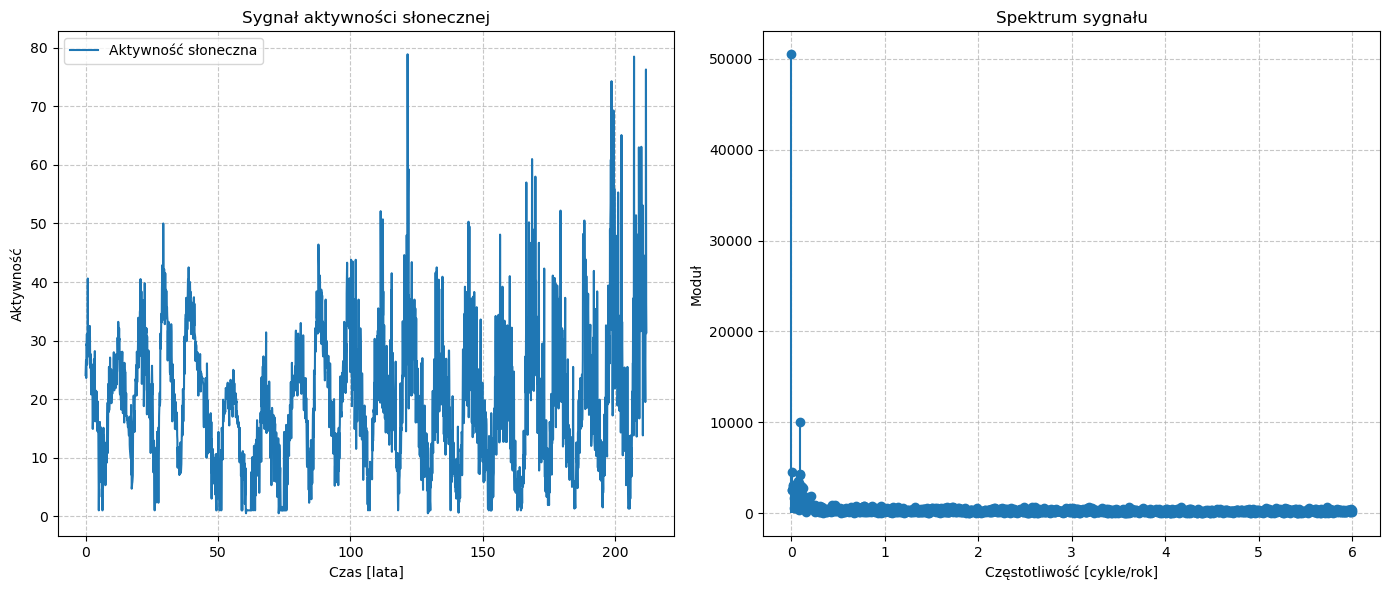

Dominująca częstotliwość cyklu aktywności słonecznej: 0.09 cykle/rok
Okres cyklu aktywności słonecznej: 11.15 lat


In [29]:
dominant_frequency = analiza_aktywnosci("spots.txt")

# Zadanie 3

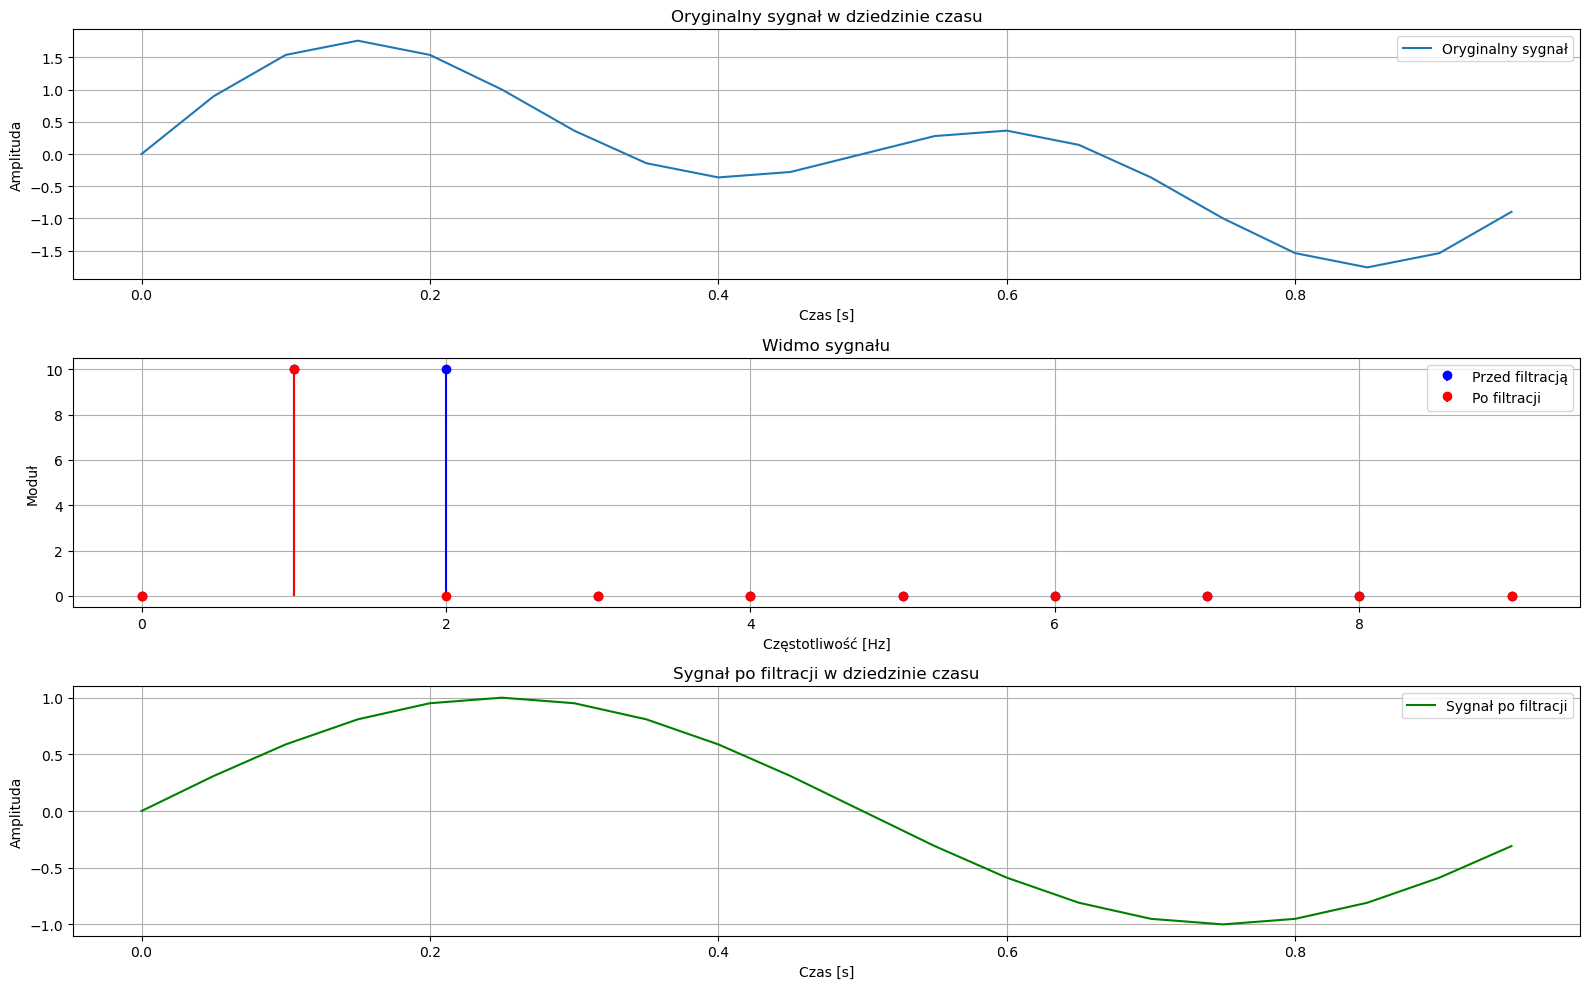

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Parametry sygnału
T = 1.0  # czas trwania [s]
w = 20  # częstotliwość próbkowania [Hz]
t = np.linspace(0, T, int(T * w), endpoint=False)  # os czasu

signal = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)

# FFT
n = len(signal)
freqs = np.fft.fftfreq(n, d=1/w) 
signal_fft = fft(signal)

filtered_fft = signal_fft.copy()
filtered_fft[np.abs(freqs + 2).argmin()] = 0 
filtered_fft[np.abs(freqs - 2).argmin()] = 0  


# Odwrotna FFT
filtered_signal = ifft(filtered_fft).real

# Wykresy
plt.figure(figsize=(16, 10))

# Oryginalny sygnał
plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Oryginalny sygnał")
plt.title("Oryginalny sygnał w dziedzinie czasu")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()

# Widmo przed i po filtracji
plt.subplot(3, 1, 2)
plt.stem(freqs[:n // 2], np.abs(signal_fft[:n // 2]), linefmt='b-', markerfmt='bo', basefmt=" ", label="Przed filtracją")
plt.stem(freqs[:n // 2], np.abs(filtered_fft[:n // 2]), linefmt='r-', markerfmt='ro', basefmt=" ", label="Po filtracji")
plt.title("Widmo sygnału")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Moduł")
plt.legend()
plt.grid(True)

# Sygnał po filtracji
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label="Sygnał po filtracji", color='green')
plt.title("Sygnał po filtracji w dziedzinie czasu")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Zadanie 4

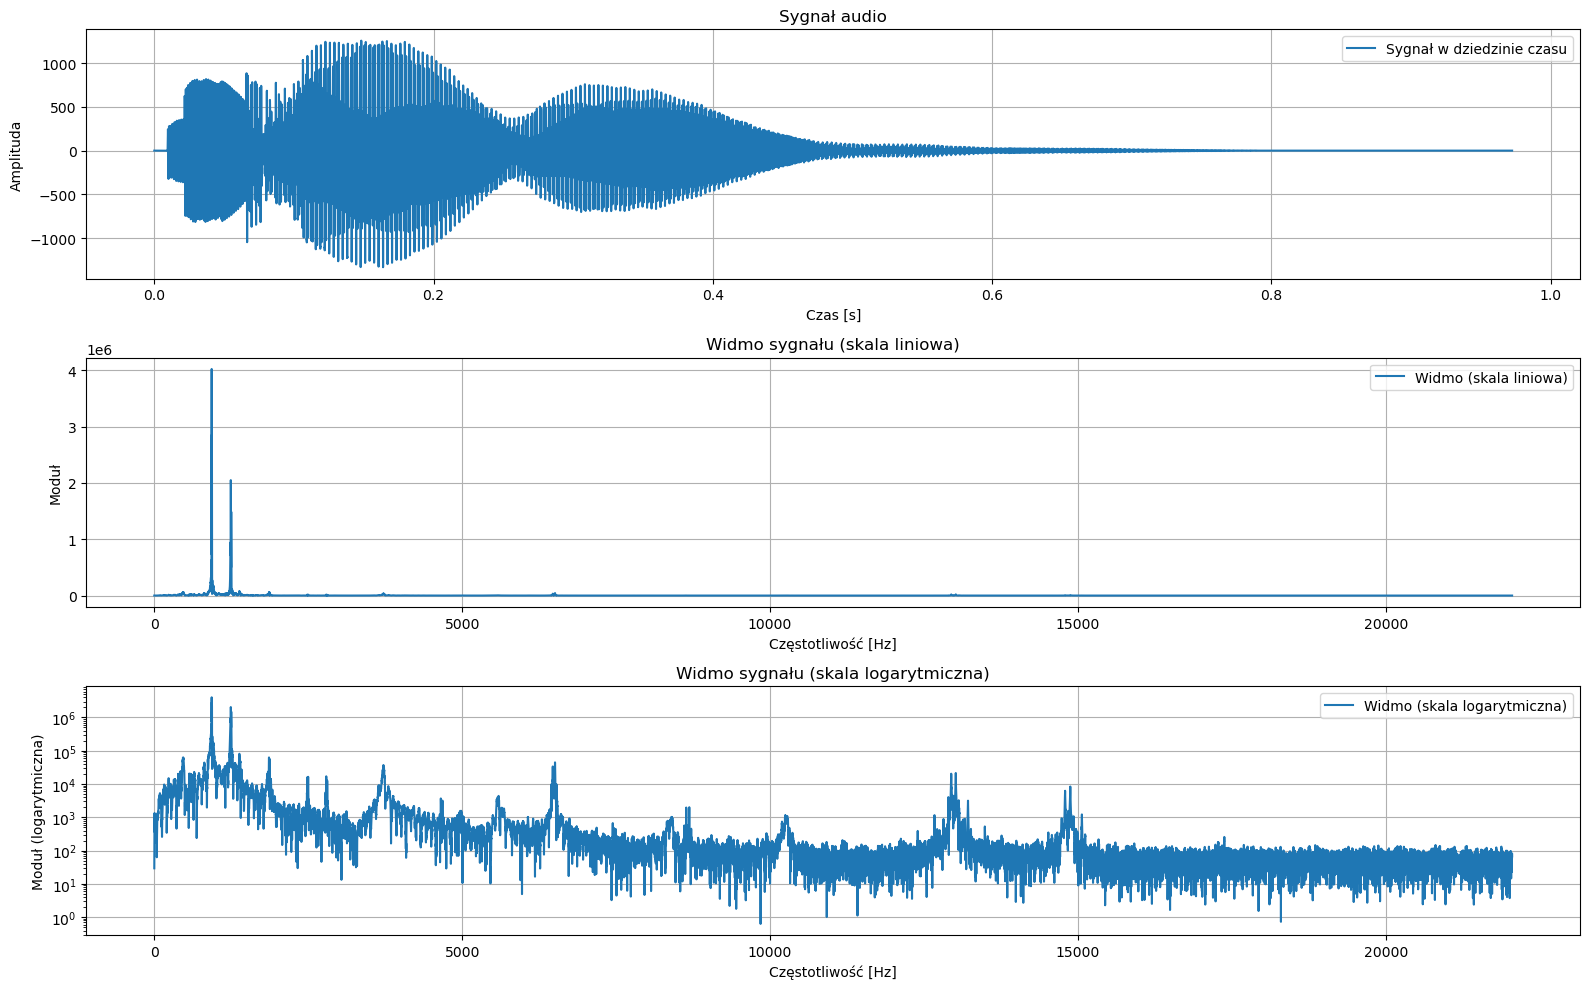

Dominujące częstotliwości w sygnale: [930.74860075 931.77705224 932.80550373 934.86240672 935.89085821] Hz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.fft import fft

# Wczytanie pliku audio
sampling_rate, signal = read("err.wav")

if len(signal.shape) > 1:
    signal = signal.mean(axis=1)

n = len(signal) 
duration = n / sampling_rate 
t = np.linspace(0, duration, n, endpoint=False)  

# FFT
signal_fft = fft(signal)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  
magnitude = np.abs(signal_fft[:n // 2])  
frequencies = frequencies[:n // 2]

# Wykresy
plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Sygnał w dziedzinie czasu")
plt.title("Sygnał audio")
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(frequencies, magnitude, label="Widmo (skala liniowa)")
plt.title("Widmo sygnału (skala liniowa)")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Moduł")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.semilogy(frequencies, magnitude, label="Widmo (skala logarytmiczna)")
plt.title("Widmo sygnału (skala logarytmiczna)")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Moduł (logarytmiczna)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

dominant_indices = np.argsort(magnitude)[-5:]
dominant_frequencies = frequencies[dominant_indices]
dominant_frequencies = np.sort(dominant_frequencies)

print(f"Dominujące częstotliwości w sygnale: {dominant_frequencies} Hz")
